In [14]:
#import sys
import psycopg2
import pandas as pd
import numpy as np
#import json
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
from sklearn.decomposition import PCA  # to apply PCA

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

In [15]:
# Reading Data
psconn1 = psycopg2.connect(host="pixel.ourcloud.ou.edu", port = 5432, database="IBM_MarketScan", user="faa_student", password="deM%9tAch^")
psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)
df=pd.DataFrame(psquery1)
#print(data_converted_17)
psconn1.close()
df.head()

C:\Users\mothu\AppData\Local\Temp\ipykernel_20816\3825094971.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VII,target_IX,target_X,target_XIX
0,2291314402,60,1,5,2,1,0,3,0,5,69,0,0,0,5,4,0,1,0,0,10,2,1,0,1,5,0,0,0,8,0,0,3,0,0,1,0,0
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0,0,1,1
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1455831702,57,1,5,1,0,0,1,0,0,54,3,0,0,1,3,1,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,25068070301,48,1,4,0,0,2,2,0,3,90,10,0,0,3,6,0,0,0,0,11,4,0,0,0,2,0,0,0,4,0,0,0,0,0,1,0,0


In [16]:
df = df[df['IX']==0]
df.drop('IX',axis = 1,inplace = True)
df.drop(['target_VII','target_X','target_XIX'],axis = 1,inplace = True)
df

,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_IX
1,2690798001,57,1,5,0,1,0,0,1,0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,1,0,0
2,2485178506,45,2,4,1,0,1,2,0,0,23,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,2308096905,23,2,2,1,0,0,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0
9,25384664001,39,1,3,1,0,0,1,0,1,18,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,2,0,0,2,0,0
10,2631532101,32,2,2,0,1,0,0,1,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146719,4277318102,26,2,2,1,0,0,0,1,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0
146720,33324061902,28,2,2,1,0,0,0,1,0,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,0,3,0,0
146724,3725120003,21,1,2,0,0,1,1,0,0,64,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,5,3,0,0,0,0
146726,3599354201,24,2,2,1,0,0,0,1,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [18]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['enrolid', 'target_IX'], axis = 1)
y = df['target_IX']

Text(0.5, 1.0, 'Class Distribution of target_IX')

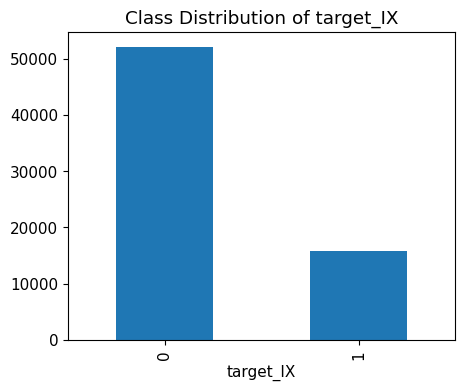

In [19]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 11})

# 2019 and 2020 combined
plt.figure(figsize=(5, 4))
ax = df['target_IX'].value_counts().plot.bar()
ax.set_title('Class Distribution of target_IX')

In [20]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [21]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

([<matplotlib.axis.XTick at 0x29a1eb6b8e0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

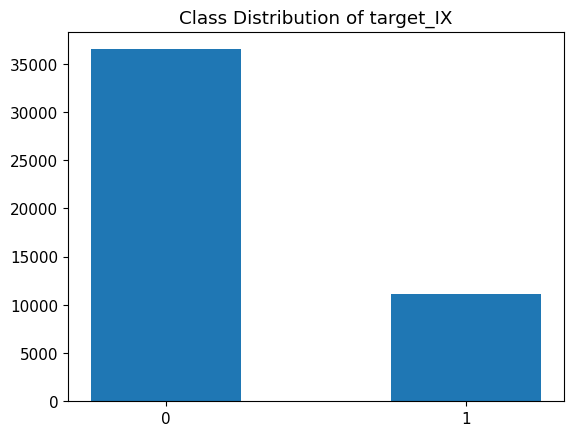

In [22]:
#search unique labels
lebels = list(np.unique(y_train))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train, return_counts=True)[1])

# label frequency
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution of target_IX')

import math
new_list = range(math.floor(min(lebels)), math.ceil(max(lebels))+1)
plt.xticks(new_list)

In [23]:
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

([<matplotlib.axis.XTick at 0x29a1ebe1de0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

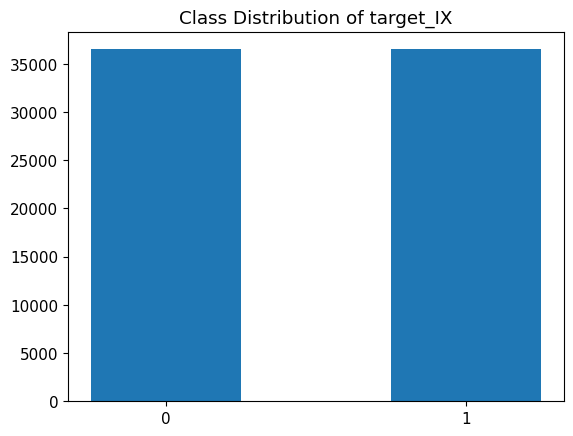

In [24]:
#search unique labels
lebels = list(np.unique(y_train_sm))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train_sm, return_counts=True)[1])

# label frequency
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution of target_IX')

import math
new_list = range(math.floor(min(lebels)), math.ceil(max(lebels))+1)
plt.xticks(new_list)

In [25]:
pca = PCA(n_components=None)  # Setting n_components to None to get explained variance
pca.fit(X_train_sm)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

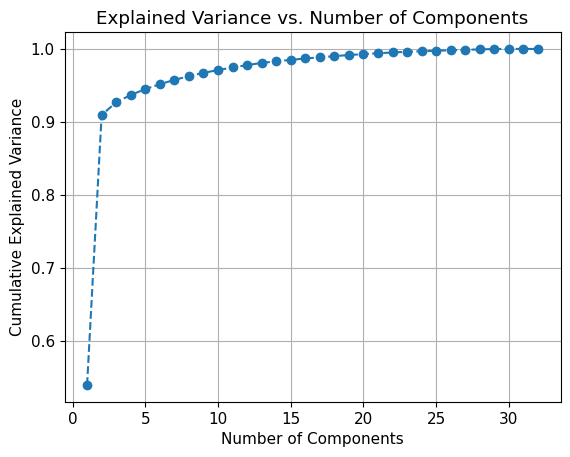

In [26]:
# Feature Selection
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [27]:
cumulative_explained_variance

array([0.53907973, 0.90925854, 0.9268004 , 0.93677236, 0.94485169,
       0.95157188, 0.95749143, 0.96265801, 0.96720528, 0.97099883,
       0.9745193 , 0.97779963, 0.9807361 , 0.9829961 , 0.98497666,
       0.98687857, 0.9885128 , 0.99009541, 0.99161826, 0.99286464,
       0.9940659 , 0.99510288, 0.99608298, 0.99679731, 0.99749331,
       0.99817502, 0.99879127, 0.9993597 , 0.99986455, 1.        ,
       1.        , 1.        ])

In [28]:
# taking 95% as threshold we are taking n_components=7
n_components=7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.fit_transform(X_test)

# Logistic Regression

## Logistic Regression without Hyperparameter Tuning

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

# Assume you have already split your PCA-transformed data into X_train_pca, X_test_pca, and y_train, y_test

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train_pca, y_train_sm)

LogisticRegression(random_state=42)

### Calculating performance metrics by choosing different threshold values

In [30]:
y_probabilities = model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4019,8101,7548,739,12120,8287,0.593914,0.347454,0.844683,0.492374,0.681176,0.329701,0.517669,0.681176,0.309207
1,0.45,3770,9498,6151,988,13268,7139,0.650169,0.380002,0.792350,0.513659,0.699645,0.349509,0.606940,0.699645,0.337801
2,0.50,3538,10303,5346,1220,13841,6566,0.678248,0.398244,0.743590,0.518692,0.700985,0.355914,0.658381,0.700985,0.342817
3,0.55,3321,10875,4774,1437,14196,6211,0.695644,0.410253,0.697982,0.516767,0.696457,0.356767,0.694933,0.696457,0.339611
4,0.60,3075,11462,4187,1683,14537,5870,0.712354,0.423437,0.646280,0.511647,0.689361,0.356131,0.732443,0.689361,0.334479
5,0.65,2678,12255,3394,2080,14933,5474,0.731759,0.441041,0.562842,0.494552,0.672979,0.350162,0.783117,0.672979,0.319974
6,0.70,2273,12909,2740,2485,15182,5225,0.743960,0.453421,0.477722,0.465254,0.651315,0.338381,0.824909,0.651315,0.297265


### Calculating performance metrics without thresholds

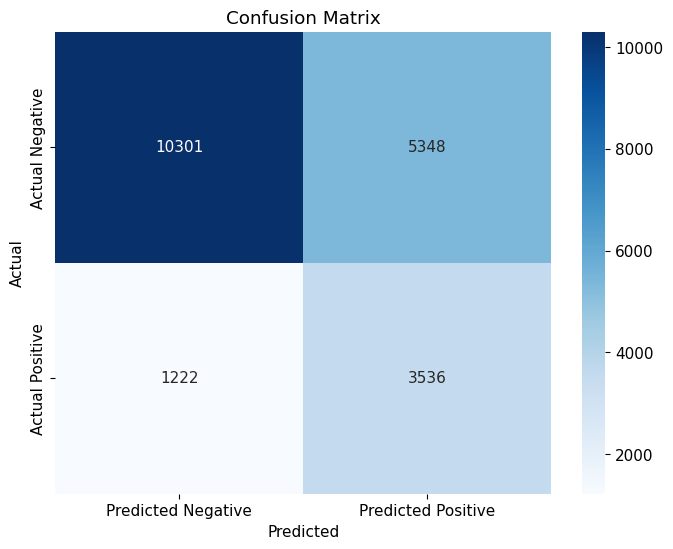

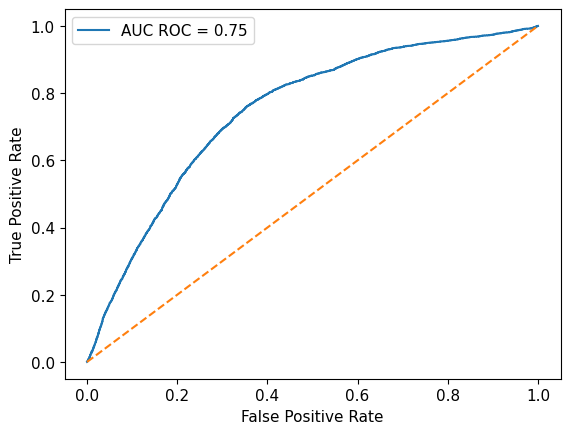

Accuracy: 0.6780516489439898
Precision: 0.3980189104007204
Recall: 0.7431693989071039
F1 Score: 0.5183990617211552
AUC-ROC: 0.7475670358979302
pr_auc 0.4299867042732905


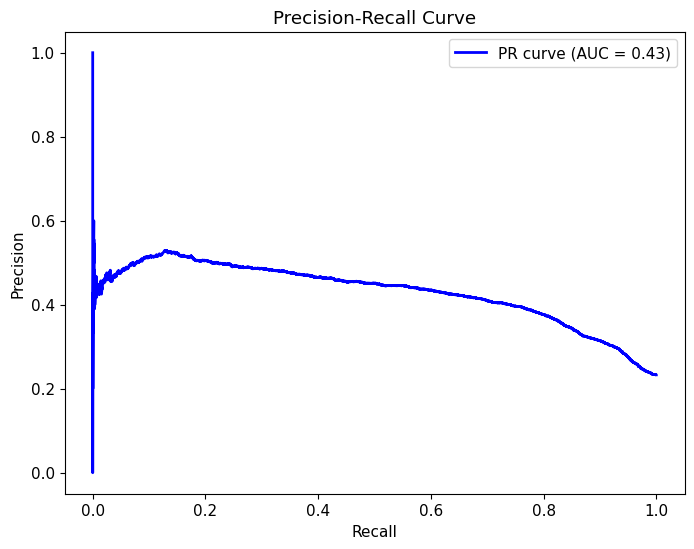

Max F1 Score: 0.5200778602840458
Threshold for Max F1 Score: 0.4902155358250911
ROC-AUC for Max F1 Threshold: 0.7031240334308461


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(model, X_test_pca, y_test)

In [38]:
y_probabilities = model.predict_proba(X_test_pca)[:, 1]
# Calculate the Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)# Calculate the F1 score for various thresholds
numerator = 2 * recall * precision
denom = recall + precision
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

print("Max F1 Score:", max_f1)
print("Threshold for Max F1 Score:", max_f1_thresh)

# Create binary predictions based on the max F1 threshold
binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

# Calculate the ROC-AUC for the specific threshold
roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

Max F1 Score: 0.5200863930885529
Threshold for Max F1 Score: 0.48960483565277546
ROC-AUC for Max F1 Threshold: 0.7032021513568023


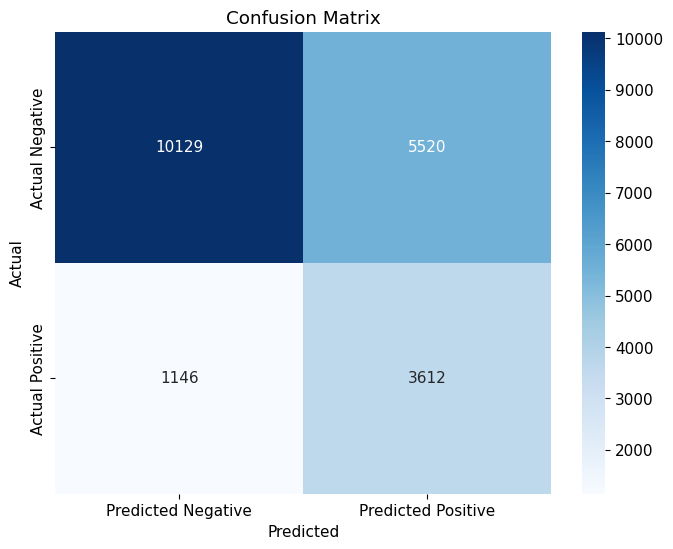

In [39]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Predict on the training set 
y_train_pred = model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.678052


## Logistic Regression using GridSearchCV

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc
import matplotlib.pyplot as plt

In [34]:
# Instantiate a logistic regression model
logreg = LogisticRegression(random_state=42)

# Define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logreg, hyperparameters, scoring='roc_auc', cv=5)
gridsearch.fit(X_train_pca, y_train_sm)
best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
# Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [35]:
gridsearch.best_score_

0.7415923830173837

In [36]:
# Train the model with the best hyperparameters on the full training set
logreg = LogisticRegression(**best_params,random_state=42)
logreg.fit(X_train_pca, y_train_sm)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

### Calculating Performace metrics using different threshold values

In [22]:
y_probabilities = logreg.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4020,8087,7562,738,12107,8300,0.593277,0.347090,0.844893,0.492044,0.680834,0.329418,0.516774,0.680834,0.308685
1,0.45,3769,9509,6140,989,13278,7129,0.650659,0.380361,0.792140,0.513943,0.699891,0.349763,0.607643,0.699891,0.338229
2,0.50,3539,10307,5342,1219,13846,6561,0.678493,0.398491,0.743800,0.518953,0.701218,0.356132,0.658636,0.701218,0.343228
3,0.55,3316,10895,4754,1442,14211,6196,0.696379,0.410905,0.696931,0.516994,0.696571,0.357034,0.696211,0.696571,0.339988
4,0.60,3078,11459,4190,1680,14537,5870,0.712354,0.423500,0.646910,0.511891,0.689581,0.356291,0.732251,0.689581,0.334805
5,0.65,2680,12276,3373,2078,14956,5451,0.732886,0.442756,0.563262,0.495791,0.673860,0.351215,0.784459,0.673860,0.321895
6,0.70,2270,12913,2736,2488,15183,5224,0.744009,0.453456,0.477091,0.464973,0.651128,0.338259,0.825165,0.651128,0.297037


### Calculating performance metrics without thresholds

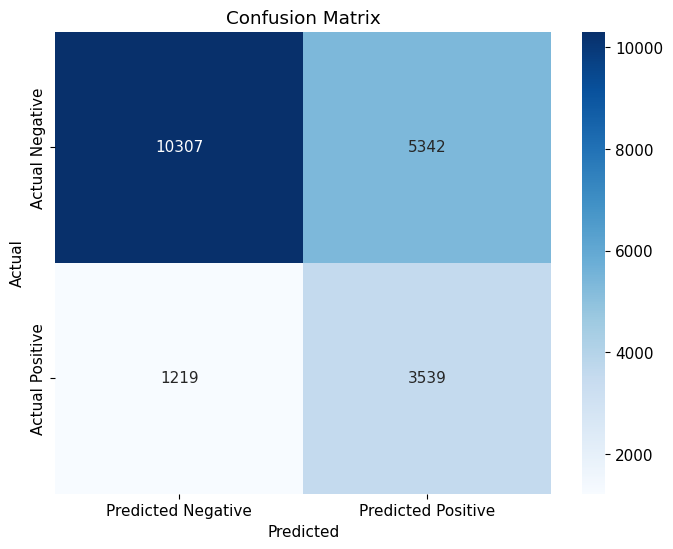

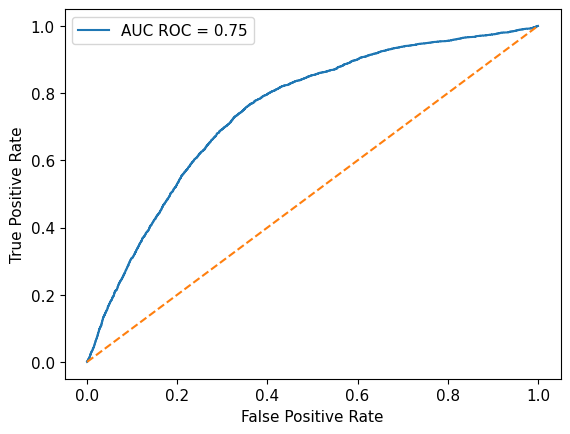

Accuracy: 0.6784926740824228
Precision: 0.39849116090530345
Recall: 0.7437999159310634
F1 Score: 0.5189530024195322
AUC-ROC: 0.7480105211610603
pr_auc 0.43128046645131535


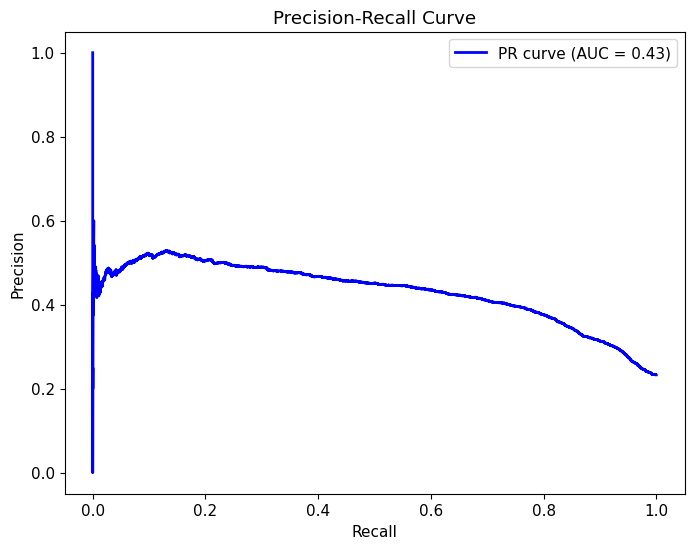

Max F1 Score: 0.5203446983889097
Threshold for Max F1 Score: 0.5145463077118839
ROC-AUC for Max F1 Threshold: 0.7014302114339931


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(logreg, X_test_pca, y_test)

In [28]:
# Predict on the training set 
y_train_pred = logreg.predict(X_train_pca)
# Predict on the testing set
y_test_pred = logreg.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.69
Testing Accuracy:  0.678493


# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

In [30]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_pca, y_train_sm)

GaussianNB()

## Calculating performance metrics using different thresholds

In [31]:
y_probabilities = gnb.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3856,7949,7700,902,11805,8602,0.578478,0.333679,0.810425,0.472723,0.659190,0.314623,0.507956,0.659190,0.271645
1,0.45,3676,8771,6878,1082,12447,7960,0.609938,0.348304,0.772594,0.480146,0.666538,0.322118,0.560483,0.666538,0.281843
2,0.50,3472,9697,5952,1286,13169,7238,0.645318,0.368421,0.729718,0.489635,0.674687,0.331861,0.619656,0.674687,0.296325
3,0.55,3304,10408,5241,1454,13712,6695,0.671926,0.386659,0.694409,0.496730,0.679750,0.339750,0.665090,0.679750,0.308120
4,0.60,3111,10978,4671,1647,14089,6318,0.690400,0.399769,0.653846,0.496172,0.677680,0.342095,0.701514,0.677680,0.309360
5,0.65,2827,11681,3968,1931,14508,5899,0.710933,0.416041,0.594157,0.489397,0.670297,0.341818,0.746437,0.670297,0.305589
6,0.70,2389,12456,3193,2369,14845,5562,0.727446,0.427983,0.502102,0.462089,0.649032,0.330979,0.795961,0.649032,0.282730


### Calculating performace metrics without thresholds

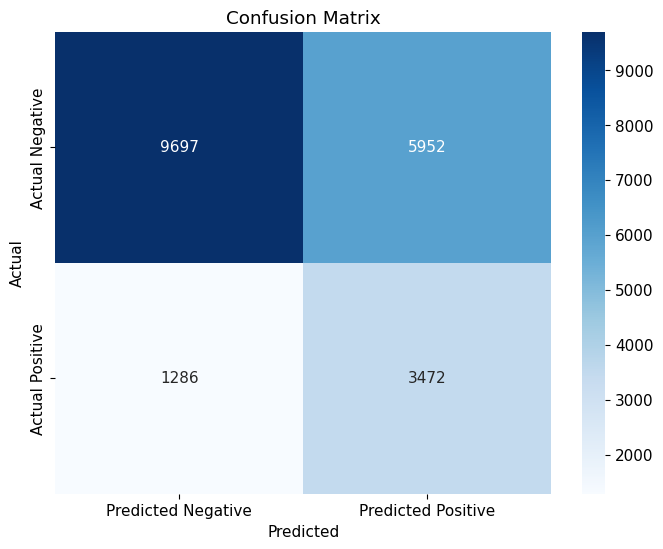

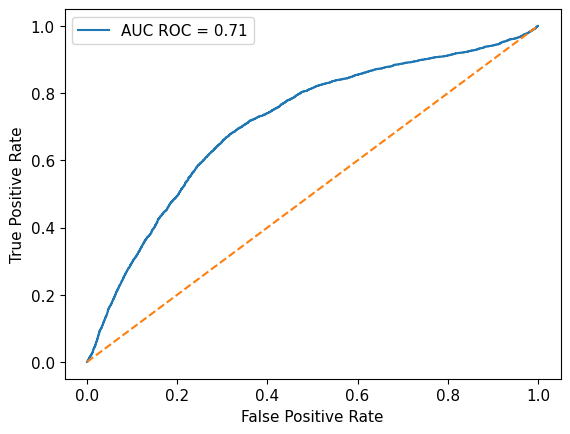

Accuracy: 0.6453177831136375
Precision: 0.3684210526315789
Recall: 0.7297183690626313
F1 Score: 0.48963474827245806
AUC-ROC: 0.712683436778309
pr_auc 0.40643402957806024


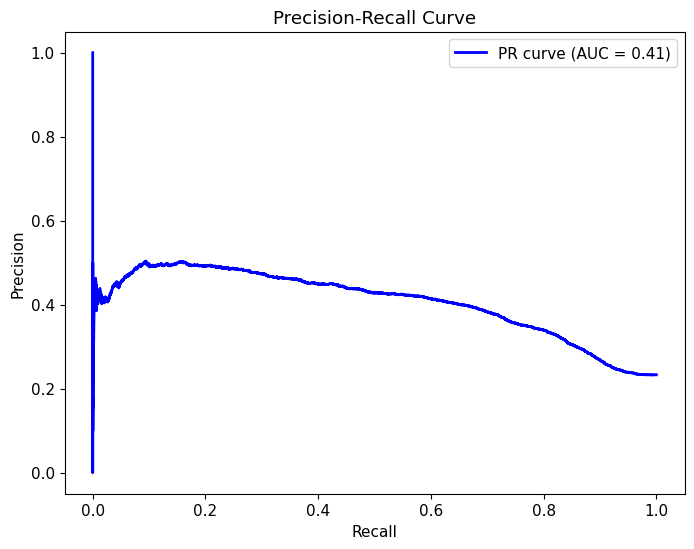

Max F1 Score: 0.498185468303606
Threshold for Max F1 Score: 0.571907459903623
ROC-AUC for Max F1 Threshold: 0.6803077501121371


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(gnb, X_test_pca, y_test)

In [33]:
# Predict on the training set 
y_train_pred = gnb.predict (X_train_pca)
# Predict on the testing set
y_test_pred = gnb.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.69
Testing Accuracy:  0.645318


# XGBOOST

In [34]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## XGBOOST without hyperparameter tuning

In [36]:
# Create an XGBoost classifier with default hyperparameters
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_classifier.fit(X_train_pca, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Calculating performance metrics using different thresholds

In [37]:
y_probabilities = xgb_classifier.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,2956,10239,5410,1802,13195,7212,0.646592,0.353335,0.621269,0.450472,0.637780,0.307819,0.654291,0.637780,0.236909
1,0.45,2659,11075,4574,2099,13734,6673,0.673004,0.367621,0.558848,0.443499,0.633281,0.308301,0.707713,0.633281,0.235632
2,0.50,2265,11919,3730,2493,14184,6223,0.695056,0.377815,0.476040,0.421278,0.618843,0.302019,0.761646,0.618843,0.220650
3,0.55,1895,12687,2962,2863,14582,5825,0.714559,0.390159,0.398277,0.394176,0.604500,0.295686,0.810723,0.604500,0.207516
4,0.60,1532,13424,2225,3226,14956,5451,0.732886,0.407772,0.321984,0.359836,0.589901,0.289379,0.857818,0.589901,0.196166
5,0.65,1150,14059,1590,3608,15209,5198,0.745283,0.419708,0.241698,0.306748,0.570047,0.278245,0.898396,0.570047,0.173748
6,0.70,820,14604,1045,3938,15424,4983,0.755819,0.439678,0.172341,0.247622,0.552782,0.268748,0.933223,0.552782,0.154901


### Calculating performace metrics without thresholds

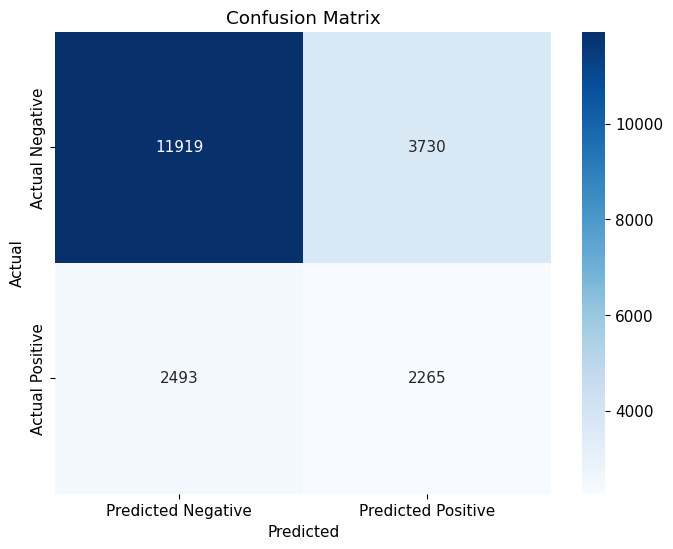

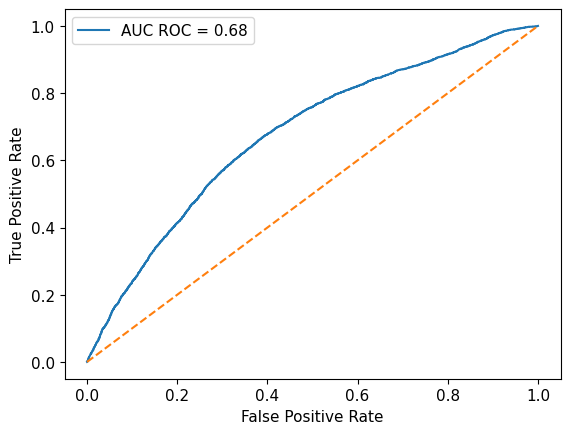

Accuracy: 0.6950556181702358
Precision: 0.377814845704754
Recall: 0.4760403530895334
F1 Score: 0.42127778294429463
AUC-ROC: 0.6763136966638159
pr_auc 0.3667813540272302


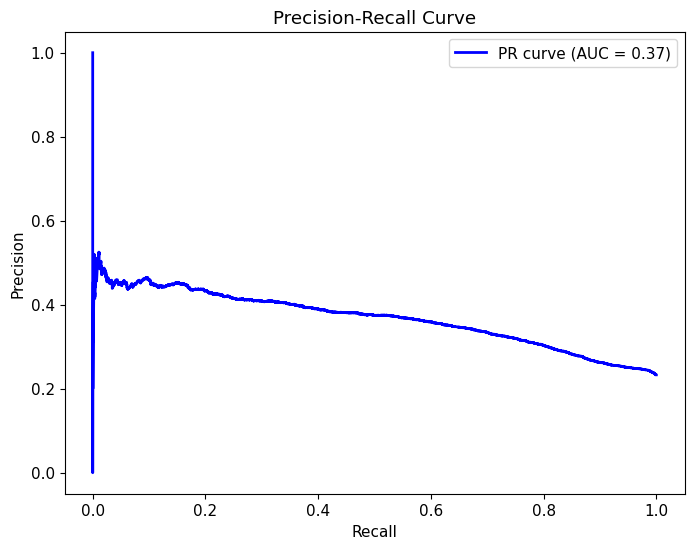

Max F1 Score: 0.4538124204272174
Threshold for Max F1 Score: 0.35531324
ROC-AUC for Max F1 Threshold: 0.6399153363653269


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(xgb_classifier, X_test_pca, y_test)

In [39]:
# Predict on the training set 
y_train_pred = xgb_classifier.predict (X_train_pca)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.78
Testing Accuracy:  0.695056


## XGBoost Using hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc
import matplotlib.pyplot as plt

In [42]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of boosting rounds
    'max_depth': [3, 4, 5],           # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(xgb_classifier, param_grid, scoring='roc_auc', cv=5, verbose=2)
gridsearch.fit(X_train_pca, y_train_sm)

best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [43]:
# Train the XGBoost model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", **best_params, random_state=42)
best_xgb_classifier.fit(X_train_pca, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Calculating performace metrics using different thresholds

In [44]:
y_probabilities = best_xgb_classifier.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,2601,10814,4835,2157,13415,6992,0.657372,0.349785,0.546658,0.426603,0.618846,0.296912,0.691035,0.618846,0.208841
1,0.45,2270,11660,3989,2488,13930,6477,0.682609,0.362678,0.477091,0.412090,0.611093,0.294949,0.745096,0.611093,0.203739
2,0.50,1892,12452,3197,2866,14344,6063,0.702896,0.371782,0.397646,0.384279,0.596676,0.288280,0.795706,0.596676,0.188967
3,0.55,1519,13175,2474,3239,14694,5713,0.720047,0.380416,0.319252,0.347160,0.580579,0.280168,0.841907,0.580579,0.171772
4,0.60,1164,13860,1789,3594,15024,5383,0.736218,0.394175,0.244641,0.301906,0.565160,0.272547,0.885680,0.565160,0.156635
5,0.65,862,14528,1121,3896,15390,5017,0.754153,0.434695,0.181169,0.255748,0.554767,0.269668,0.928366,0.554767,0.156370
6,0.70,527,15014,635,4231,15541,4866,0.761552,0.453528,0.110761,0.178041,0.535092,0.257564,0.959422,0.535092,0.128064


### Calculating performance metrics without thresholds

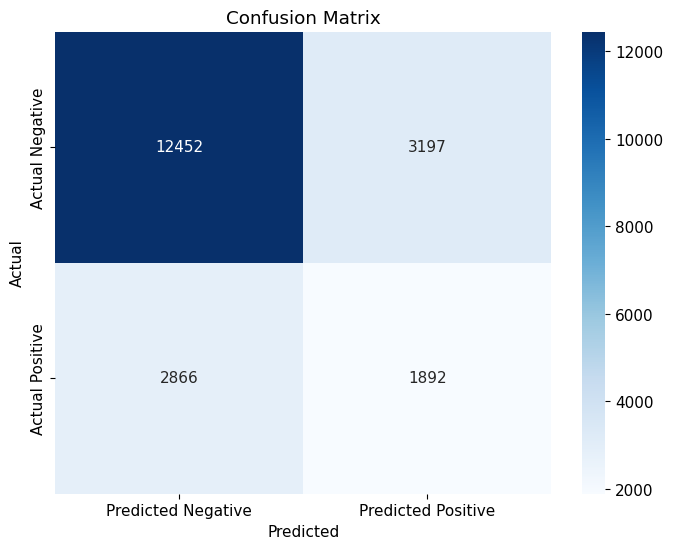

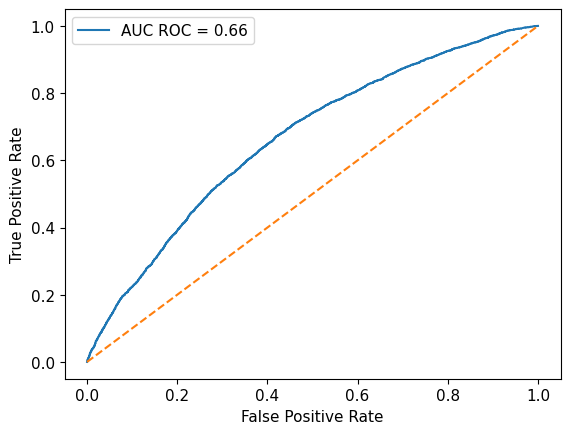

Accuracy: 0.7028960650757093
Precision: 0.3717822754961682
Recall: 0.39764606977721734
F1 Score: 0.38427947598253276
AUC-ROC: 0.6644216543078776
pr_auc 0.3606660901230395


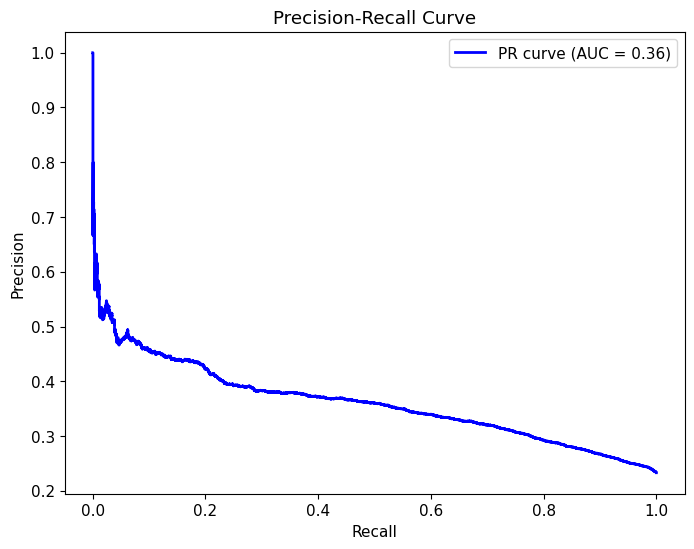

Max F1 Score: 0.44068458384850656
Threshold for Max F1 Score: 0.28395584
ROC-AUC for Max F1 Threshold: 0.6250402542686447


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_xgb_classifier, X_test_pca, y_test)

In [46]:
# Predict on the training set 
y_train_pred = best_xgb_classifier.predict (X_train_pca)
# Predict on the testing set
y_test_pred = best_xgb_classifier.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.78
Testing Accuracy:  0.702896


# SVM

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## SVM without hyperparameter tuning

In [48]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42,probability=True)

# Train the SVM model on the training data
svm_classifier.fit(X_train_pca, y_train_sm)

SVC(kernel='linear', probability=True, random_state=42)

### Calculating Performace metrics using different threshold values

In [50]:
y_probabilities = svm_classifier.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3888,8627,7022,870,12515,7892,0.613270,0.356370,0.817150,0.496298,0.684216,0.333840,0.551281,0.684216,0.312325
1,0.45,3666,9794,5855,1092,13460,6947,0.659578,0.385044,0.770492,0.513481,0.698173,0.350184,0.625855,0.698173,0.335935
2,0.50,3548,10255,5394,1210,13803,6604,0.676386,0.396779,0.745691,0.517956,0.700502,0.355168,0.655313,0.700502,0.341744
3,0.55,3262,11123,4526,1496,14385,6022,0.704905,0.418850,0.685582,0.520006,0.698181,0.360464,0.710780,0.698181,0.345003
4,0.60,3021,11596,4053,1737,14617,5790,0.716274,0.427057,0.634931,0.510649,0.687968,0.356269,0.741006,0.687968,0.334021
5,0.65,2798,12084,3565,1960,14882,5525,0.729260,0.439730,0.588062,0.503192,0.680126,0.354634,0.772190,0.680126,0.328841
6,0.70,2221,13002,2647,2537,15223,5184,0.745970,0.456245,0.466793,0.461459,0.648822,0.337292,0.830852,0.648822,0.295302


### Calculating performance metrics without using thresholds

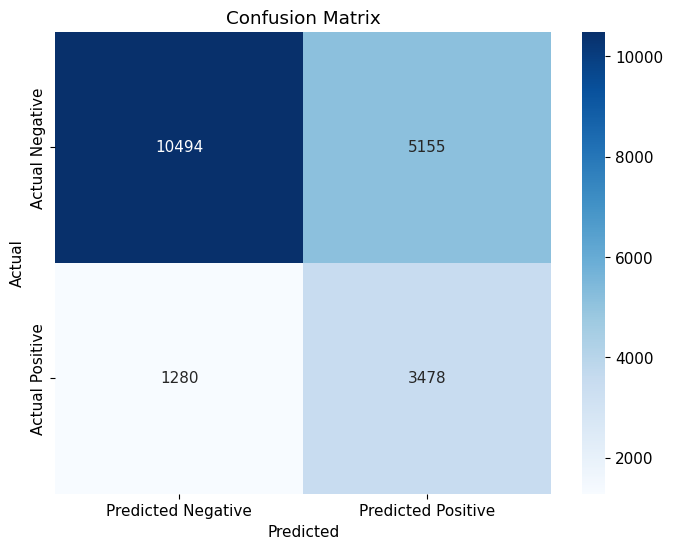

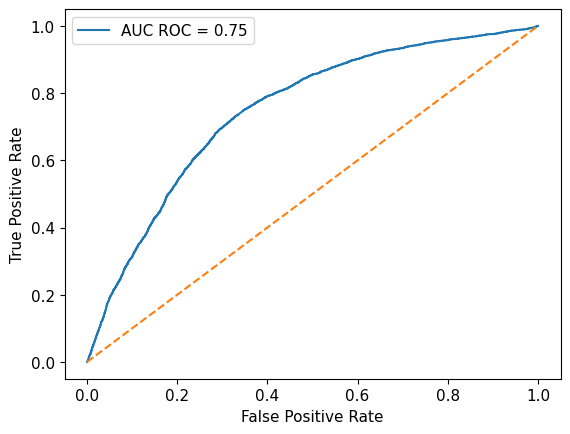

Accuracy: 0.6846670260204831
Precision: 0.40287269778755935
Recall: 0.7309794031105507
F1 Score: 0.5194533641998357
AUC-ROC: 0.7492149192090214
pr_auc 0.4378553183613119


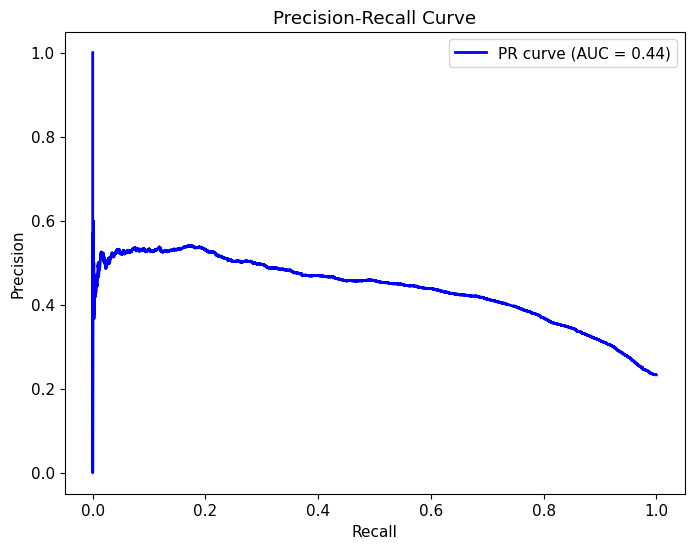

Max F1 Score: 0.5207690481841918
Threshold for Max F1 Score: 0.5448192064875516
ROC-AUC for Max F1 Threshold: 0.6991838493199288


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(svm_classifier, X_test_pca, y_test)

In [52]:
# Predict on the training set 
y_train_pred = svm_classifier.predict (X_train_pca)
# Predict on the testing set
y_test_pred = svm_classifier.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.69
Testing Accuracy:  0.684667


## SVM with hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svm_classifier = SVC(random_state=42,probability=True)
# Define the hyperparameters to search over
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                   'degree':[0,1,2,3,4]}
randomsearch = RandomizedSearchCV(svm_classifier, hyperparameters,cv=5,n_iter=2)
randomsearch.fit(X_train_pca, y_train_sm)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")
pd.DataFrame(randomsearch.cv_results_)[['param_kernel','param_C','param_gamma','param_degree','mean_test_score']]
# {'kernel': 'poly', 'gamma': 0.01, 'degree': 1, 'C': 10}

In [53]:
svm_classifier_best = SVC(random_state=42,probability=True,kernel='poly',C=10,gamma=0.01,degree=1)
svm_classifier_best.fit(X_train_pca, y_train_sm)

SVC(C=10, degree=1, gamma=0.01, kernel='poly', probability=True,
    random_state=42)

### Calculating performace metrics using different thresholds

In [54]:
y_probabilities = svm_classifier_best.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3880,8652,6997,878,12532,7875,0.614103,0.356716,0.815469,0.496322,0.684174,0.333915,0.552879,0.684174,0.312185
1,0.45,3657,9799,5850,1101,13456,6951,0.659382,0.384664,0.768600,0.512723,0.697387,0.349605,0.626174,0.697387,0.334634
2,0.50,3541,10277,5372,1217,13818,6589,0.677121,0.397285,0.744220,0.518031,0.700470,0.355304,0.656719,0.700470,0.341812
3,0.55,3253,11147,4502,1505,14400,6007,0.705640,0.419471,0.683691,0.519939,0.698002,0.360538,0.712314,0.698002,0.344973
4,0.60,3014,11625,4024,1744,14639,5768,0.717352,0.428247,0.633459,0.511021,0.688159,0.356738,0.742859,0.688159,0.334763
5,0.65,2806,12072,3577,1952,14878,5529,0.729064,0.439605,0.589744,0.503725,0.680583,0.354908,0.771423,0.680583,0.329393
6,0.70,2225,13005,2644,2533,15230,5177,0.746313,0.456973,0.467633,0.462242,0.649338,0.337820,0.831044,0.649338,0.296306


### Calculating performance metrics without thresholds

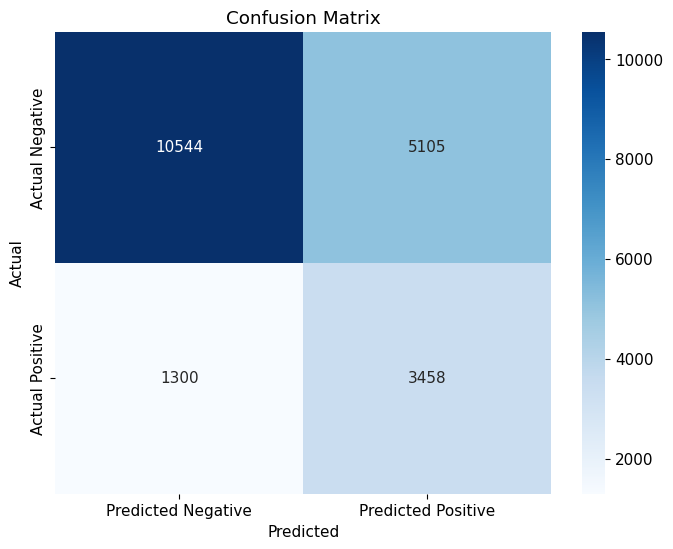

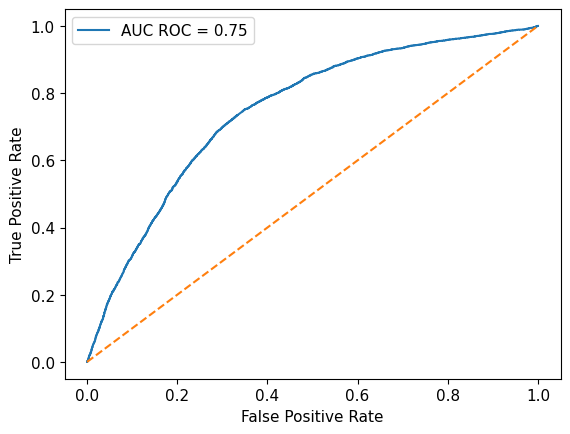

Accuracy: 0.6861371098152594
Precision: 0.40383043325937173
Recall: 0.726775956284153
F1 Score: 0.5191802417235943
AUC-ROC: 0.7493208179189266
pr_auc 0.4386505866984777


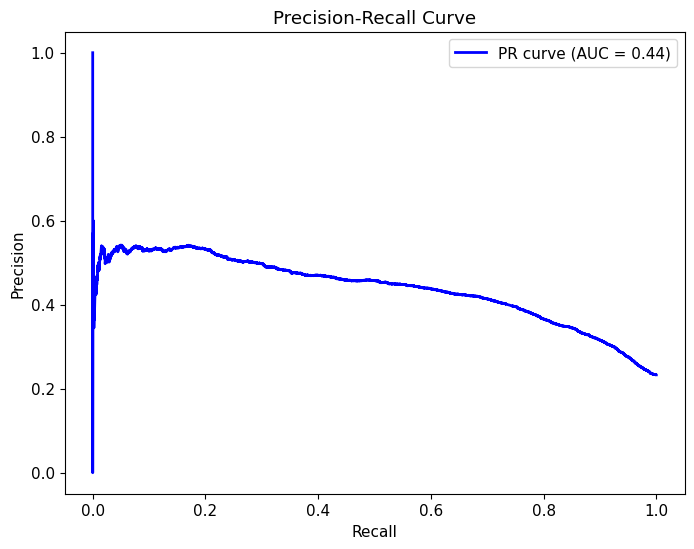

Max F1 Score: 0.5205479452054794
Threshold for Max F1 Score: 0.5473842481552261
ROC-AUC for Max F1 Threshold: 0.6986839227976513


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(svm_classifier_best, X_test_pca, y_test)

In [56]:
# Predict on the training set 
y_train_pred = svm_classifier_best.predict(X_train_pca)
# Predict on the testing set
y_test_pred = svm_classifier_best.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.69
Testing Accuracy:  0.686137


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## Random Forest Without Hyperparameter tuning

In [58]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_model.fit(X_train_pca, y_train_sm)

RandomForestClassifier(random_state=42)

### Calculating performance metrics using different thresholds

In [59]:
y_probabilities = rf_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)   

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3450,8762,6887,1308,12212,8195,0.598422,0.333753,0.725095,0.457105,0.642501,0.306098,0.559908,0.642501,0.241042
1,0.45,2598,11203,4446,2160,13801,6606,0.676288,0.368825,0.546028,0.440264,0.630960,0.307234,0.715892,0.630960,0.232950
2,0.50,1791,13002,2647,2967,14793,5614,0.724898,0.403560,0.376419,0.389517,0.603635,0.297299,0.830852,0.603635,0.212452
3,0.55,1074,14163,1486,3684,15237,5170,0.746656,0.419531,0.225725,0.293523,0.565383,0.275225,0.905042,0.565383,0.166936
4,0.60,516,14952,697,4242,15468,4939,0.757975,0.425392,0.108449,0.172835,0.531955,0.254003,0.955460,0.531955,0.114290
5,0.65,218,15391,258,4540,15609,4798,0.764885,0.457983,0.045818,0.083301,0.514665,0.243456,0.983513,0.514665,0.082170
6,0.70,82,15561,88,4676,15643,4764,0.766551,0.482353,0.017234,0.033279,0.505805,0.237450,0.994377,0.505805,0.054016


### Calculating performace metrics without thresholds

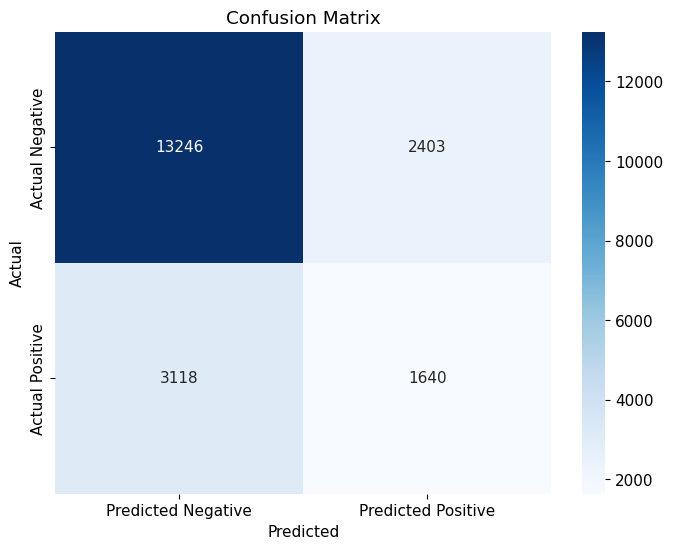

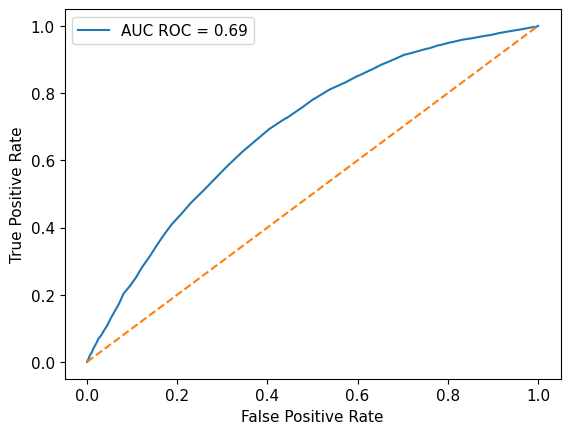

Accuracy: 0.7294555789680012
Precision: 0.40563937670046996
Recall: 0.344682639764607
F1 Score: 0.3726849221679354
AUC-ROC: 0.6902175526151393
pr_auc 0.37068395674502574


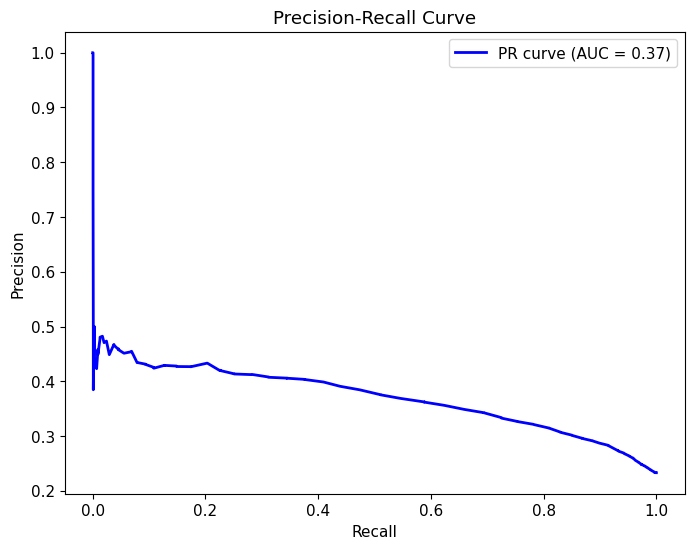

Max F1 Score: 0.4589412255106294
Threshold for Max F1 Score: 0.4066666666666666
ROC-AUC for Max F1 Threshold: 0.6447544239135699


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(rf_model, X_test_pca, y_test)

In [62]:
# Predict on the training set 
y_train_pred = rf_model.predict(X_train_pca)
# Predict on the testing set
y_test_pred = rf_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.729456


## Random Forest Using hyperparameter tuning

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy', 'log_loss']  
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")


grid_search.fit(X_train_pca, y_train_sm)
# took around 5 hours

In [ ]:
import pickle

filename = 'rf_best_grid_total.sav'
pickle.dump(grid_search,open(filename,'wb'))

grid_search_rf1 = pickle.load(open(filename,'rb'))
print(grid_search_rf1.best_params_)

In [ ]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {grid_search.best_score_}")
#Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 200}
#Best score: 0.8302701668417659

In [ ]:
#best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
#best_rf_model.fit(X_pca, y_train_sm)

In [64]:
best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='gini',max_depth=20,max_features=None,min_samples_leaf=5,n_estimators=200)
best_rf_model.fit(X_train_pca,y_train_sm)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

### Calculating performace metrics using different thresholds

In [65]:
y_probabilities = best_rf_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3419,9776,5873,1339,13195,7212,0.646592,0.367951,0.718579,0.486690,0.671642,0.330017,0.624704,0.671642,0.291474
1,0.45,2884,11146,4503,1874,14030,6377,0.687509,0.390416,0.606137,0.474928,0.659194,0.328477,0.712250,0.659194,0.280138
2,0.50,2201,12364,3285,2557,14565,5842,0.713726,0.401203,0.462589,0.429715,0.626336,0.310892,0.790082,0.626336,0.240982
3,0.55,1547,13440,2209,3211,14987,5420,0.734405,0.411874,0.325137,0.363401,0.591989,0.291263,0.858841,0.591989,0.200741
4,0.60,1012,14273,1376,3746,15285,5122,0.749008,0.423786,0.212694,0.283235,0.562383,0.273701,0.912071,0.562383,0.164122
5,0.65,523,14923,726,4235,15446,4961,0.756897,0.418735,0.109920,0.174130,0.531764,0.253554,0.953607,0.531764,0.112062
6,0.70,210,15393,256,4548,15603,4804,0.764591,0.450644,0.044136,0.080398,0.513889,0.242754,0.983641,0.513889,0.078628


### Calculating performance metrics without thresholds

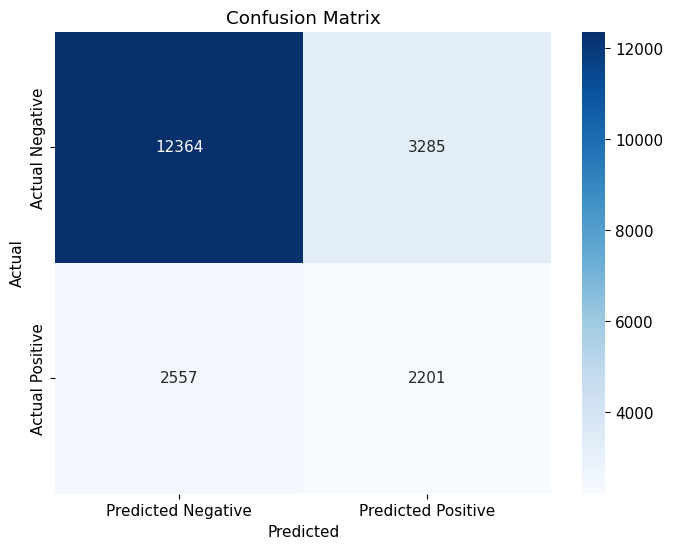

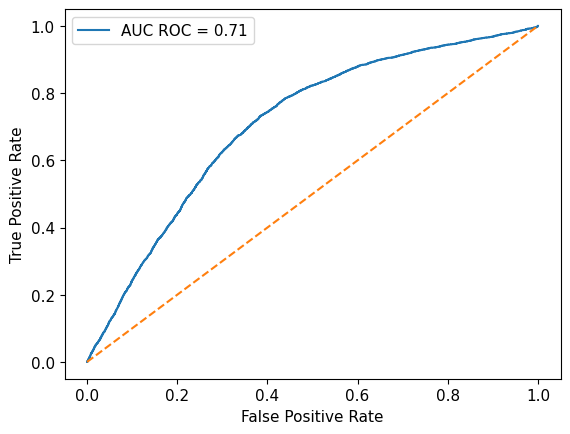

Accuracy: 0.7137256823638948
Precision: 0.4012030623405031
Recall: 0.46258932324506097
F1 Score: 0.4297149550956658
AUC-ROC: 0.7097202001634695
pr_auc 0.38108527410032433


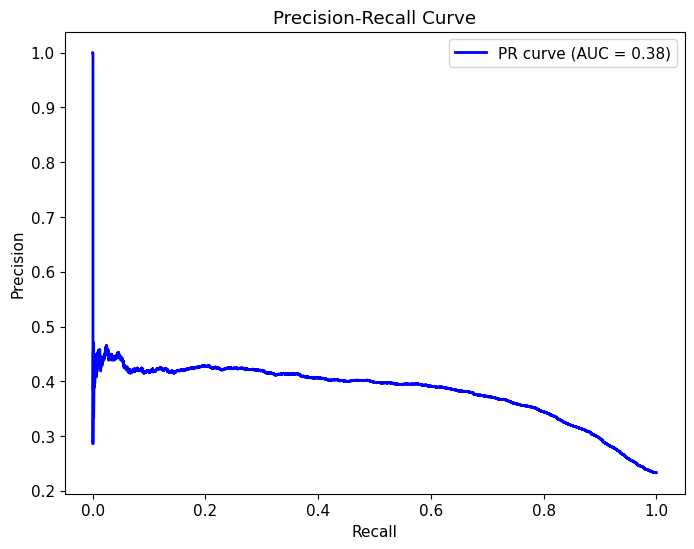

Max F1 Score: 0.48858703262848346
Threshold for Max F1 Score: 0.39345299507452297
ROC-AUC for Max F1 Threshold: 0.6738218268240613


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_rf_model, X_test_pca, y_test)

In [67]:
# Predict on the training set 
y_train_pred = best_rf_model.predict(X_train_pca)
# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.89
Testing Accuracy:  0.713726


# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## KNN without hyperparameter tuning

In [69]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train_sm)

KNeighborsClassifier()

### Calculating performace metrics using different thresholds

In [70]:
y_probabilities = knn_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3591,7269,8380,1167,10860,9547,0.532170,0.299975,0.754729,0.429314,0.609616,0.283586,0.464503,0.609616,0.188246
1,0.45,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
2,0.50,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
3,0.55,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
4,0.60,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
5,0.65,1546,12866,2783,3212,14412,5995,0.706228,0.357126,0.324926,0.340266,0.573544,0.273437,0.822161,0.573544,0.152132
6,0.70,1546,12866,2783,3212,14412,5995,0.706228,0.357126,0.324926,0.340266,0.573544,0.273437,0.822161,0.573544,0.152132


### Calculating performance metrics without thresholds

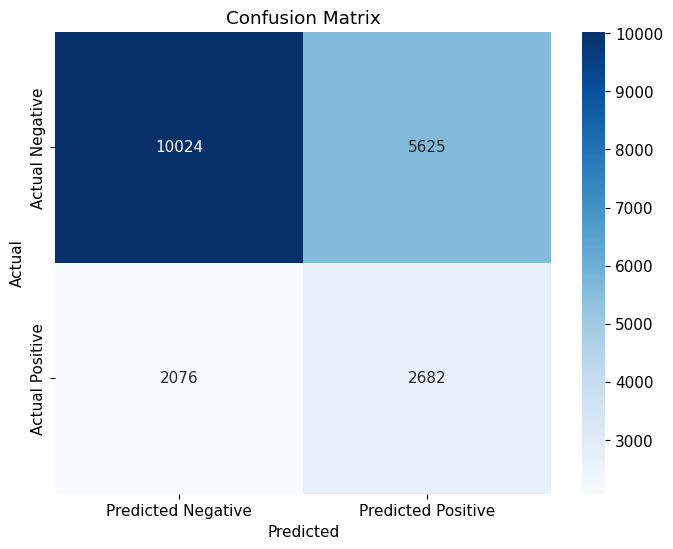

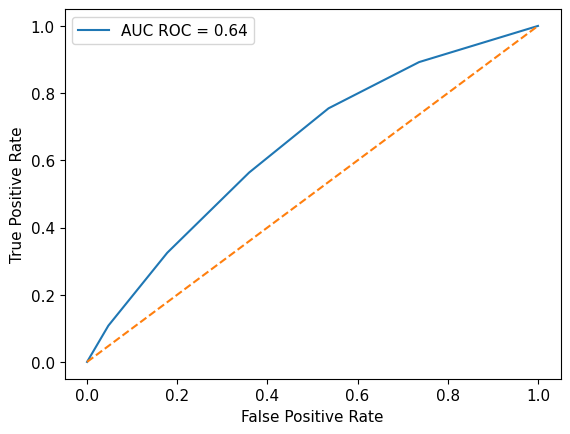

Accuracy: 0.6226294898809233
Precision: 0.3228602383531961
Recall: 0.5636822194199244
F1 Score: 0.4105625717566016
AUC-ROC: 0.6424400972565155
pr_auc 0.3661825455461518


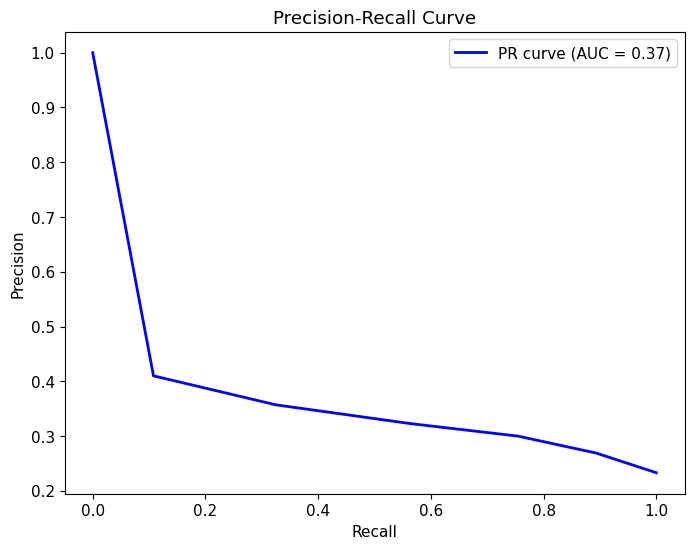

Max F1 Score: 0.4293143642776017
Threshold for Max F1 Score: 0.4
ROC-AUC for Max F1 Threshold: 0.6096157009013223


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(knn_model, X_test_pca, y_test)

In [72]:
# Predict on the training set 
y_train_pred = knn_model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = knn_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.83
Testing Accuracy:  0.622629


## KNN with hyperparamter tuning

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc
import matplotlib.pyplot as plt

In [ ]:
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}

# Create a Grid Search object with the KNN model and hyperparameters to tune
grid_search = GridSearchCV(knn_tune_model, hyperparameters, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train_pca, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')
                    


In [ ]:
best_params=grid_search.best_params_
grid_search.best_score_
# KNeighborsClassifier(leaf_size=20, n_neighbors=2, weights='distance')
#Best hyperparameters found: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}

In [81]:
# Train the model with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, n_neighbors= 5, weights= 'distance')
knn_best.fit(X_train_pca, y_train_sm)

KNeighborsClassifier(leaf_size=20, weights='distance')

### Calculating performace metrics using different thresholds

In [82]:
y_probabilities = knn_best.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3005,9040,6609,1753,12045,8362,0.590239,0.312565,0.631568,0.418174,0.604620,0.283308,0.577673,0.604620,0.177247
1,0.45,2682,10021,5628,2076,12703,7704,0.622482,0.322744,0.563682,0.410468,0.602021,0.283655,0.640360,0.602021,0.175605
2,0.50,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
3,0.55,2680,10030,5619,2078,12710,7697,0.622826,0.322930,0.563262,0.410508,0.602099,0.283722,0.640936,0.602099,0.175775
4,0.60,2040,11562,4087,2718,13602,6805,0.666536,0.332953,0.428752,0.374828,0.583792,0.275944,0.738833,0.583792,0.154597
5,0.65,1546,12865,2784,3212,14411,5996,0.706179,0.357044,0.324926,0.340229,0.573512,0.273410,0.822097,0.573512,0.152053
6,0.70,1546,12866,2783,3212,14412,5995,0.706228,0.357126,0.324926,0.340266,0.573544,0.273437,0.822161,0.573544,0.152132


### Calculating performance metrics without thresholds

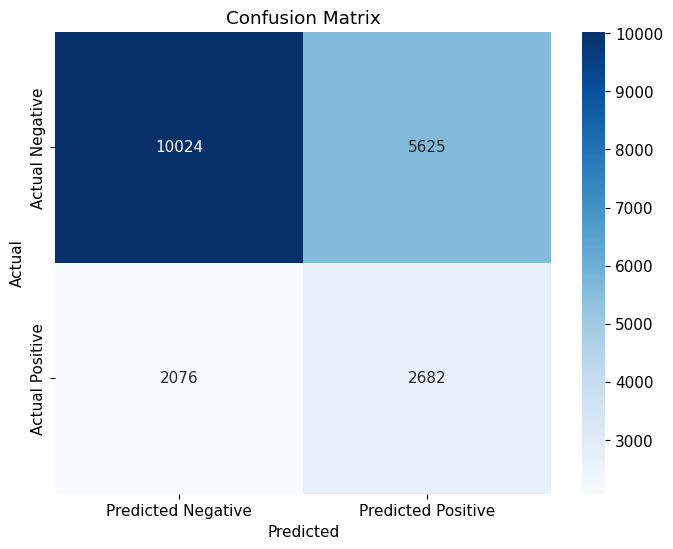

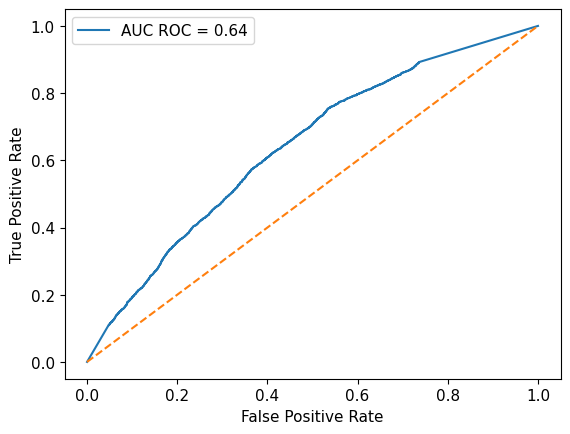

Accuracy: 0.6226294898809233
Precision: 0.3228602383531961
Recall: 0.5636822194199244
F1 Score: 0.4105625717566016
AUC-ROC: 0.6396857973861272
pr_auc 0.36039462532400957


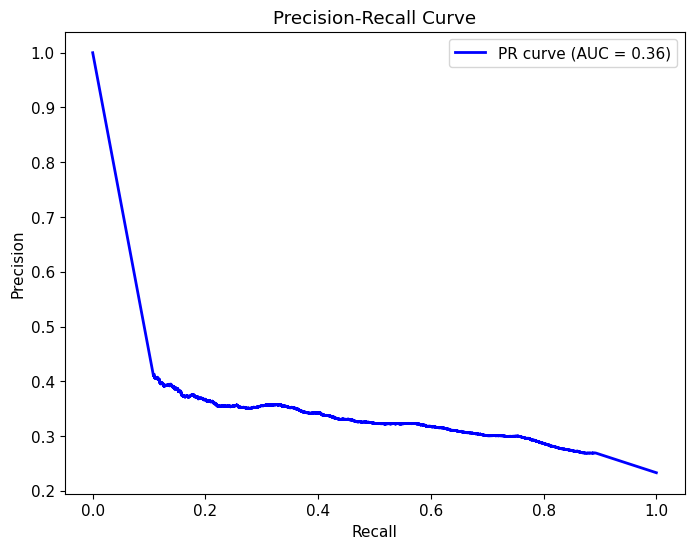

Max F1 Score: 0.42959684172747936
Threshold for Max F1 Score: 0.365915997361308
ROC-AUC for Max F1 Threshold: 0.6099671610585208


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(knn_best, X_test_pca, y_test)

In [84]:
# Predict on the training set 
y_train_pred = knn_best.predict (X_train_pca)
# Predict on the testing set
y_test_pred = knn_best.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.622629


# Gradient Boosting

## Gradient Boosting Without Hyperparameter tuning

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train_pca, y_train_sm)

GradientBoostingClassifier()

### Calculating performace metrics using different thresholds

In [86]:
y_probabilities = clf.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3929,8211,7438,829,12140,8267,0.594894,0.345650,0.825767,0.487318,0.675233,0.326049,0.524698,0.675233,0.298327
1,0.45,3685,9106,6543,1073,12791,7616,0.626795,0.360285,0.774485,0.491792,0.678188,0.331616,0.581890,0.678188,0.301381
2,0.50,3364,10112,5537,1394,13476,6931,0.660362,0.377935,0.707020,0.492569,0.676598,0.335517,0.646175,0.676598,0.301154
3,0.55,2948,11292,4357,1810,14240,6167,0.697800,0.403559,0.619588,0.488767,0.670584,0.338736,0.721580,0.670584,0.300915
4,0.60,2474,12268,3381,2284,14742,5665,0.722399,0.422545,0.519966,0.466221,0.651957,0.331631,0.783948,0.651957,0.284107
5,0.65,1889,13303,2346,2869,15192,5215,0.744450,0.446045,0.397016,0.420105,0.623551,0.317676,0.850086,0.623551,0.257646
6,0.70,892,14629,1020,3866,15521,4886,0.760572,0.466527,0.187474,0.267466,0.561147,0.276906,0.934820,0.561147,0.177455


### Calculating performance metrics without thresholds

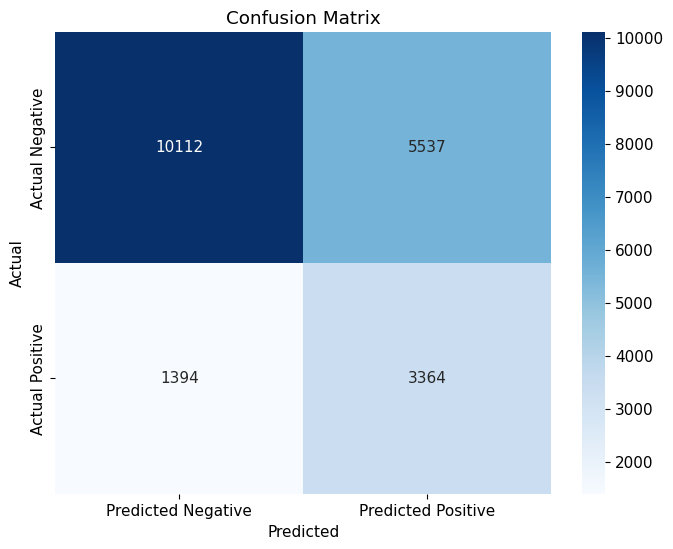

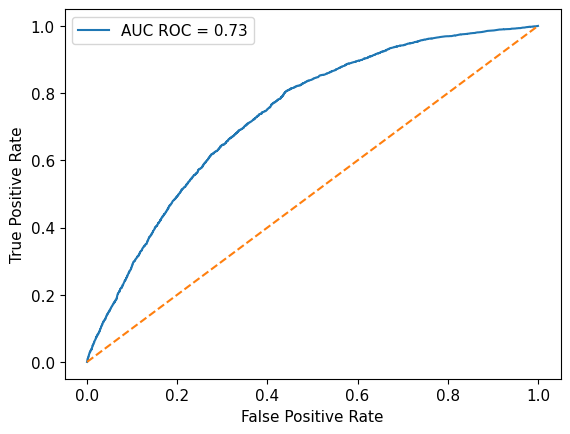

Accuracy: 0.660361640613515
Precision: 0.3779350634760139
Recall: 0.7070197562000841
F1 Score: 0.4925690021231423
AUC-ROC: 0.73428999689516
pr_auc 0.4184643843777288


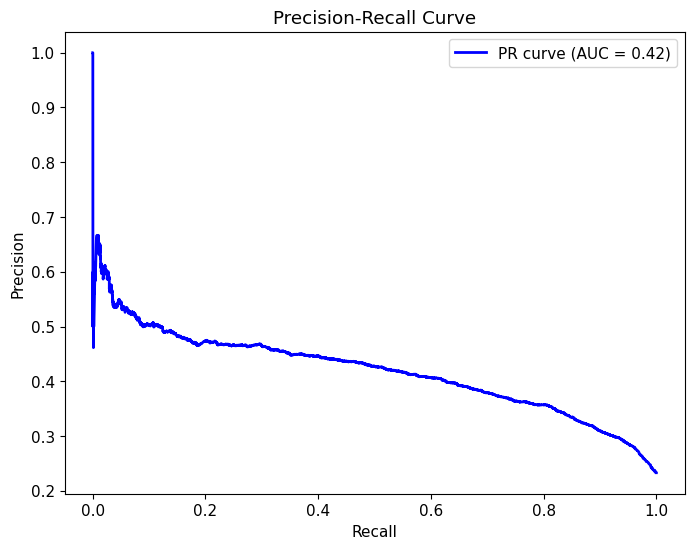

Max F1 Score: 0.49473752179247105
Threshold for Max F1 Score: 0.42528267805017955
ROC-AUC for Max F1 Threshold: 0.6821876503113663


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(clf, X_test_pca, y_test)

In [89]:
# Predict on the training set 
y_train_pred = clf.predict(X_train_pca)
# Predict on the testing set
y_test_pred = clf.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.660362


## Gradient Boosting with Hyperparameter tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
gb_model = GradientBoostingClassifier()

# Define a parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
random_search.fit(X_train_pca, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
#Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}


In [93]:
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_pca, y_train_sm)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                           n_estimators=50, subsample=0.8)

### Calculating performace metrics using different thresholds

In [94]:
y_probabilities = best_gb_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3774,8824,6825,984,12598,7809,0.617337,0.356071,0.793190,0.491502,0.678530,0.330651,0.563870,0.678530,0.302186
1,0.45,3509,9865,5784,1249,13374,7033,0.655363,0.377596,0.737495,0.499466,0.683943,0.339680,0.630392,0.683943,0.312361
2,0.50,3238,10709,4940,1520,13947,6460,0.683442,0.395940,0.680538,0.500618,0.682431,0.343937,0.684325,0.682431,0.314823
3,0.55,2822,11592,4057,1936,14414,5993,0.706326,0.410234,0.593106,0.485005,0.666928,0.338182,0.740750,0.666928,0.298632
4,0.60,2260,12488,3161,2498,14748,5659,0.722693,0.416897,0.474989,0.444051,0.636498,0.320431,0.798006,0.636498,0.261354
5,0.65,1697,13421,2228,3061,15118,5289,0.740824,0.432357,0.356662,0.390879,0.607145,0.304203,0.857627,0.607145,0.229896
6,0.70,848,14665,984,3910,15513,4894,0.760180,0.462882,0.178226,0.257360,0.557673,0.274099,0.937121,0.557673,0.170621


### Calculating performance metrics without thresholds

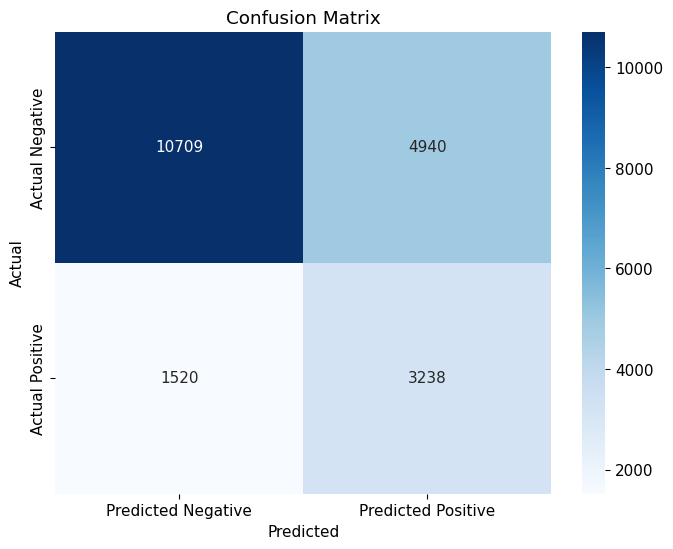

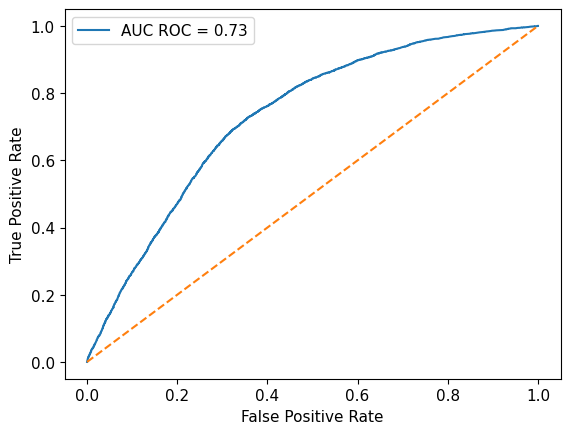

Accuracy: 0.6834419561915029
Precision: 0.3959403277084862
Recall: 0.6805380411937789
F1 Score: 0.5006184291898578
AUC-ROC: 0.7316353170223264
pr_auc 0.4084074759133253


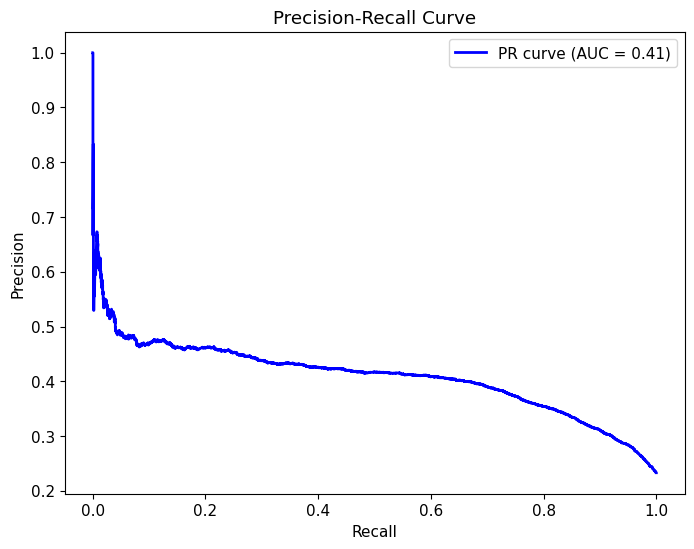

Max F1 Score: 0.5022565593207373
Threshold for Max F1 Score: 0.49456485298683656
ROC-AUC for Max F1 Threshold: 0.6842208518199442


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_gb_model, X_test_pca, y_test)

In [97]:
# Predict on the training set 
y_train_pred = best_gb_model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = best_gb_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.72
Testing Accuracy:  0.683442


# MLP

In [98]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, random_state=42)
mlp.fit(X_train_pca, y_train_sm)

MLPClassifier(max_iter=500, random_state=42)

### Calculating performace metrics using different thresholds

In [100]:
y_probabilities = mlp.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4025,7982,7667,733,12007,8400,0.588377,0.344252,0.845944,0.489362,0.678004,0.327137,0.510065,0.678004,0.304325
1,0.45,3841,8943,6706,917,12784,7623,0.626452,0.364179,0.807272,0.501927,0.689373,0.338927,0.571474,0.689373,0.320480
2,0.50,3624,9755,5894,1134,13379,7028,0.655608,0.380752,0.761665,0.507705,0.692514,0.345575,0.623363,0.692514,0.326347
3,0.55,3342,10579,5070,1416,13921,6486,0.682168,0.397290,0.702396,0.507517,0.689207,0.348443,0.676018,0.689207,0.325067
4,0.60,2966,11474,4175,1792,14440,5967,0.707600,0.415348,0.623371,0.498529,0.678290,0.346729,0.733210,0.678290,0.316129
5,0.65,2572,12339,3310,2186,14911,5496,0.730681,0.437266,0.540563,0.483459,0.664524,0.343490,0.788485,0.664524,0.307181
6,0.70,1931,13324,2325,2827,15255,5152,0.747538,0.453712,0.405843,0.428445,0.628635,0.322667,0.851428,0.628635,0.267760


### Calculating performace metrics without using different thresholds

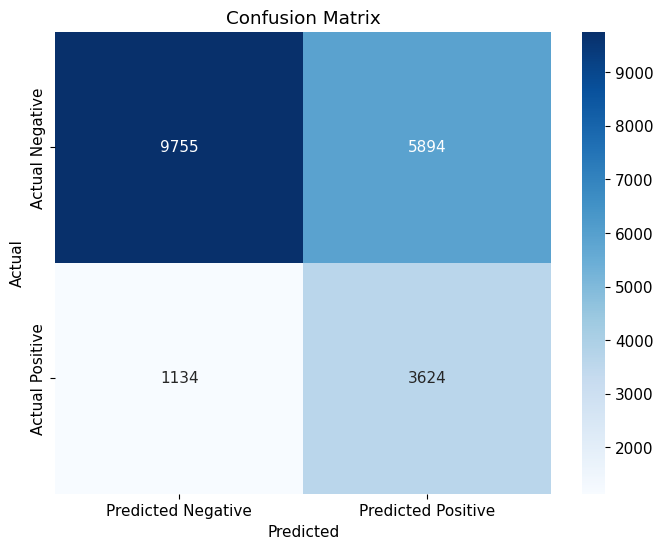

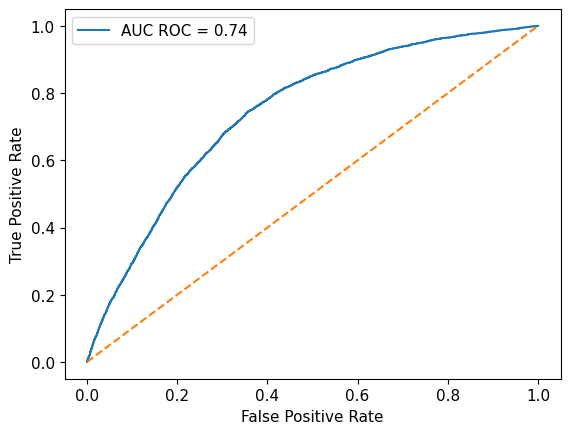

Accuracy: 0.6556083696770716
Precision: 0.38075225887791553
Recall: 0.7616645649432535
F1 Score: 0.5077052395629028
AUC-ROC: 0.7439163843663582
pr_auc 0.43104318404559233


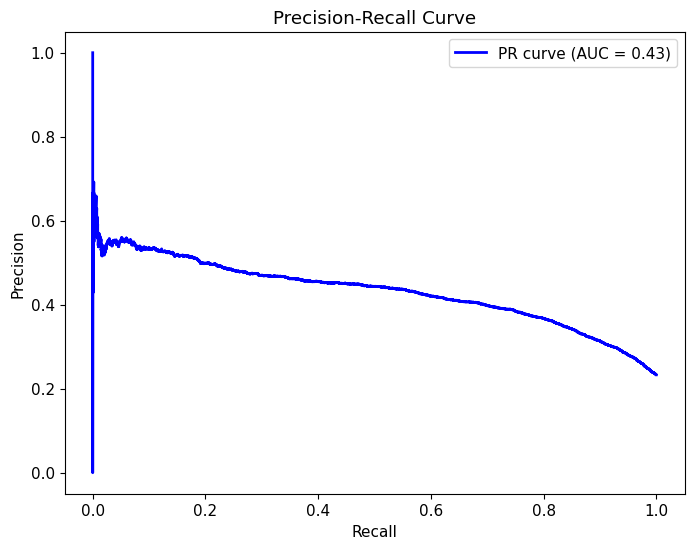

Max F1 Score: 0.510715320011584
Threshold for Max F1 Score: 0.5215353944680806
ROC-AUC for Max F1 Threshold: 0.6940461703870354


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(mlp, X_test_pca, y_test)

In [102]:
# Predict on the training set 
y_train_pred = mlp.predict (X_train_pca)
# Predict on the testing set
y_test_pred = mlp.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.655608


In [103]:
# Define a dictionary of hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a RandomSearchCV object
random_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')

random_search.fit(X_train_pca, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
#Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'relu'}

Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'relu'}


In [104]:
best_mlp_model = MLPClassifier(max_iter=500, random_state=42, **best_params)
best_mlp_model.fit(X_train_pca, y_train_sm)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
              max_iter=500, random_state=42)

### Calculating performace metrics using different thresholds

In [105]:
y_probabilities = best_mlp_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3984,8542,7107,774,12526,7881,0.613809,0.359210,0.837327,0.502745,0.691588,0.338704,0.545850,0.691588,0.325277
1,0.45,3751,9472,6177,1007,13223,7184,0.647964,0.377820,0.788356,0.510827,0.696817,0.347203,0.605278,0.696817,0.333011
2,0.50,3442,10368,5281,1316,13810,6597,0.676729,0.394589,0.723413,0.510645,0.692974,0.349939,0.662534,0.692974,0.329879
3,0.55,2993,11316,4333,1765,14309,6098,0.701181,0.408545,0.629046,0.495366,0.676080,0.343483,0.723113,0.676080,0.310413
4,0.60,2563,12237,3412,2195,14800,5607,0.725241,0.428954,0.538672,0.477592,0.660319,0.338627,0.781967,0.660319,0.297947
5,0.65,2044,13115,2534,2714,15159,5248,0.742833,0.446483,0.429592,0.437875,0.633832,0.324799,0.838073,0.633832,0.271320
6,0.70,1369,14075,1574,3389,15444,4963,0.756799,0.465172,0.287726,0.355538,0.593572,0.299912,0.899418,0.593572,0.225250


### Calculating performace metrics without using different thresholds

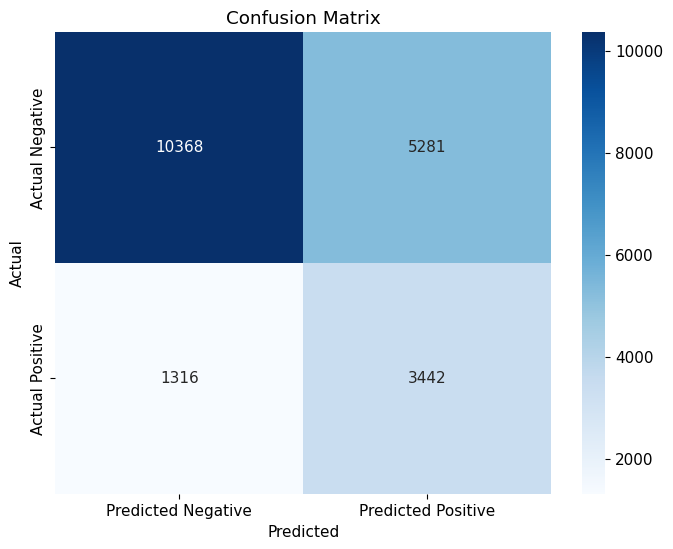

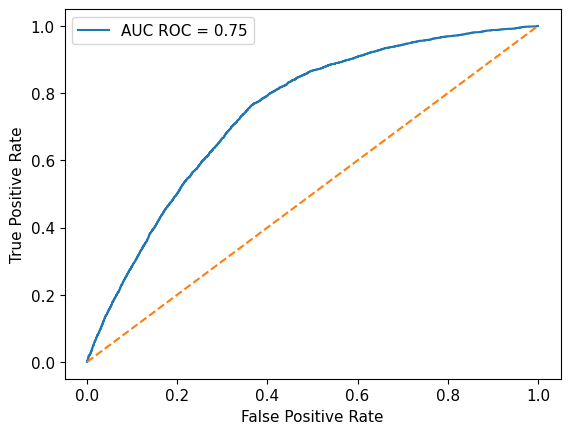

Accuracy: 0.6767285735286911
Precision: 0.3945890175398372
Recall: 0.7234131988230349
F1 Score: 0.5106446109339069
AUC-ROC: 0.74547174564669
pr_auc 0.4247414070268596


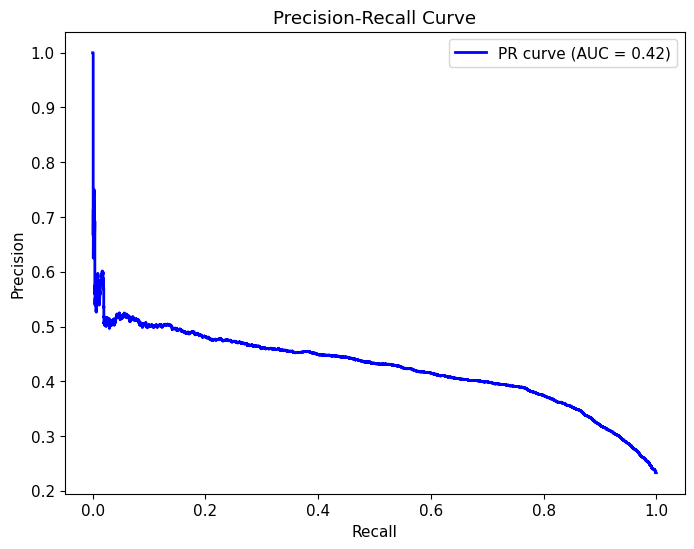

Max F1 Score: 0.5155839545615902
Threshold for Max F1 Score: 0.47756057719553086
ROC-AUC for Max F1 Threshold: 0.6995754260841645


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)
    
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_mlp_model, X_test_pca, y_test)

In [107]:
# Predict on the training set 
y_train_pred = best_mlp_model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = best_mlp_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.676729
